In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil


In [30]:
saveFile = "2015-AA0011-Energy"
fileName = 'AA0011_Energy.csv'
csvFilePath = './txtFiles/%s' % fileName
ruta_carpeta = './graficas/%s' % saveFile
archivo_plot  = 'graph.png'
graph_path = os.path.join(ruta_carpeta, archivo_plot)
data = pd.read_csv(csvFilePath)


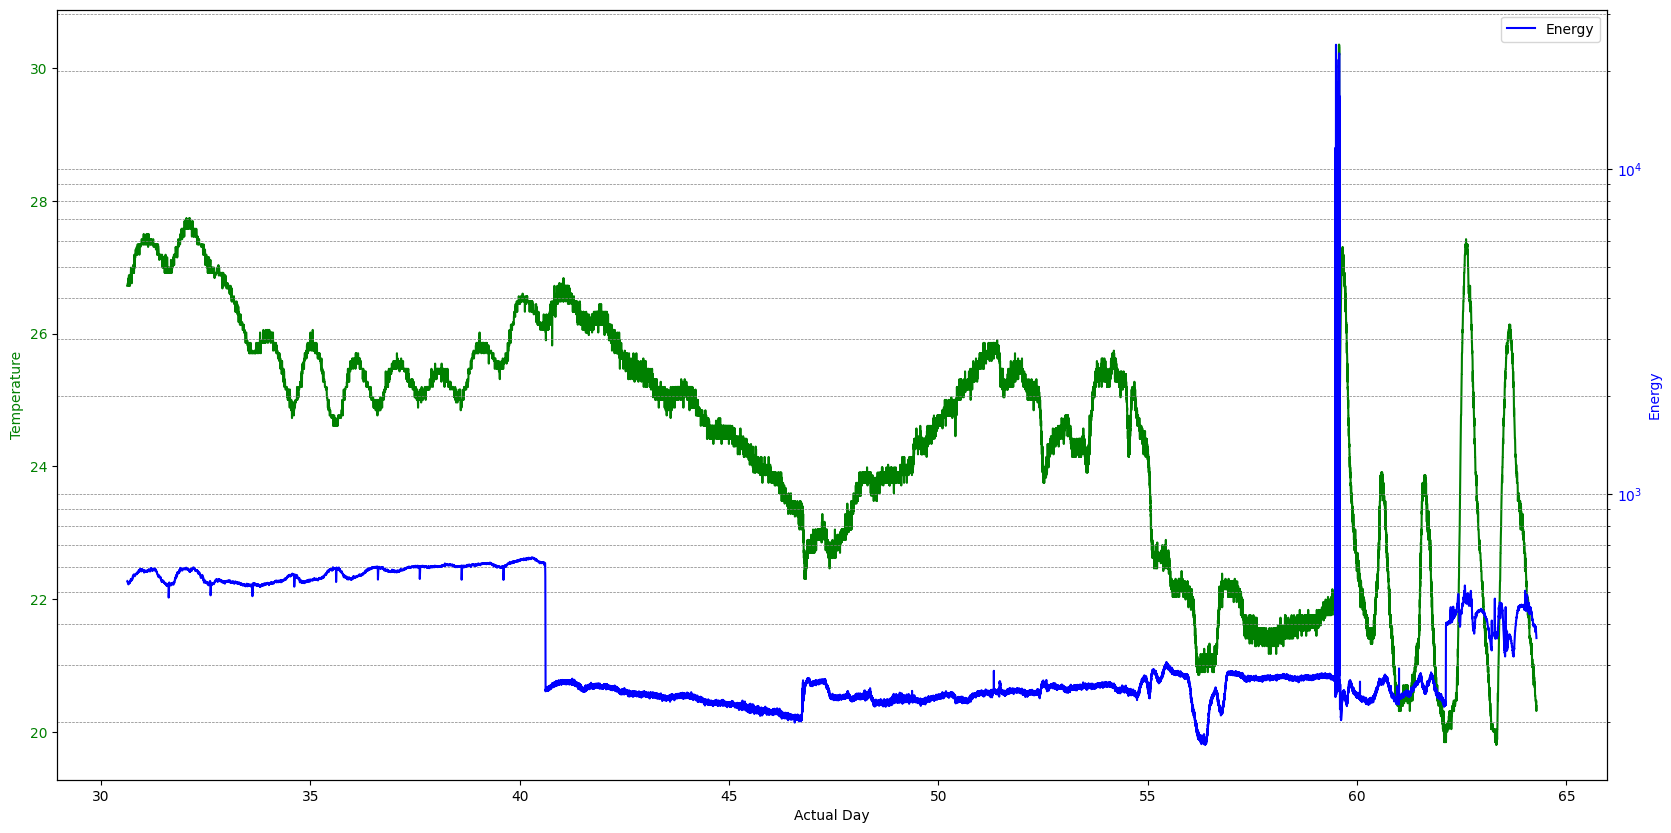

In [31]:

# --------------------
# Convertir la columna Temp a numérico, forzando errores a NaN
data['Temp'] = pd.to_numeric(data['Temp'], errors='coerce')
# Definir el rango máximo de temperatura
max_temp = 1500
# Filtrar datos para mantener solo las temperaturas dentro del rango deseado
data_filtered = data[data['Temp'] <= max_temp]
# Normalizar la columna Temp dividiéndola entre 25.6
data_filtered['Temp'] = data_filtered['Temp'] / 25.6

# --------------------
day = data_filtered[['tDays']]
temp = data_filtered[['Temp']]
energy = np.sqrt(data_filtered['Energy'])
x = data_filtered[['X']]
y = data_filtered[['Y']]
z = data_filtered[['Z']]

#------------------------

os.makedirs(ruta_carpeta, exist_ok=True)

# -----------------------

# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(20, 10))

# Graficar la temperatura en el eje izquierdo (Temp vs Actual Day)
ax1.plot(day, temp, color='g', label='Temperature')
ax1.set_xlabel('Actual Day')
ax1.set_ylabel('Temperature', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Crear un segundo eje para graficar la energía en el mismo gráfico (Energy vs Actual Day)
ax2 = ax1.twinx()
ax2.plot(day, energy, color='b', label='Energy')
ax2.set_ylabel('Energy', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.yscale('log')

plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.savefig(graph_path, format='png')
plt.show()

#-------------
if not os.path.isfile(csvFilePath):
    print(f'El archivo de origen no existe: {csvFilePath}')
else:
    new_csv_file_path = os.path.join(ruta_carpeta, f'{fileName}')
    os.makedirs(ruta_carpeta, exist_ok=True)
    shutil.move(csvFilePath, new_csv_file_path)



In [32]:
comportamiento = '-'
new_folder_path = ruta_carpeta + comportamiento 

if not os.path.exists(new_folder_path):
    # Renombrar la carpeta
    os.rename(ruta_carpeta, new_folder_path)
    print(f'Carpeta renombrada a: {new_folder_path}')
else:
    print(f'La carpeta de destino ya existe: {new_folder_path}')

Carpeta renombrada a: ./graficas/2015-AA0011-Energy-infertil
